## Business Undertsanding

In this project, the goal is to evaluate a sophisticated marketing algorithm used by a large bank to predict whether a customer will subscribe to a term deposit. The bank's phone marketing strategy relies heavily on these predictions, making the algorithm a critical tool for optimizing customer outreach.

**Key Focus Areas:**
1. **Responsible AI:** Ensuring the transparency and accountability of the algorithm, allowing management to understand the decision-making process.
2. **Explainability:** Understanding how the classification model drives decisions, ensuring the bank can explain and defend these outcomes to stakeholders.
3. **Stakeholder Engagement:** PwC’s approach involves tailoring explanations to different stakeholders, ensuring that both overall decision processes and individual predictions are clear.

Our work is to assess and provide insights into how the algorithm works and how decisions are made, as well as making the results understandable and explainable for the bank’s management.

In [47]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [48]:
#Import the necessary libraries

import pandas as pd
import numpy as np
import tensorflow as tp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [49]:
#Load the dataset into a dataframe

df = pd.read_csv(r"C:\Users\ADMIN\Downloads\archive\bank-additional-full.csv",sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [50]:
# Print out the columns in the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

1. age - Age of the customer.

2. job - Type of job that the customer holds.

3. marital - Marital status of the customer.

4. education - Level of education of the customer.

5. default - Whether the customer has credit in default.

6. housing - Whether the cusomer has housing loan.

7. loan - Whether the customer has a personal loan.

8. contact -  Contact communication type.

9. month - Last contact month of the year.

10. day_of_week - Day of the week when the customer was last contacted.

11. duration - last contact duration, in seconds.

12. campaign - number of contact performed during this campaign.

13. pdays- Number of days since the client was last contacted from a previous campaign.

14. previous - Number of contacts performed before this campaign.

15. poutcome - Outcome of the previous marketing campaign.

16. emp.var.rate - Employment Variation rate.

17. cons.price.idx - Consumer Price Index.

18. cons.conf.idx - Consumer Confidence Index.

19. euribor3m - Euribor 3 month rate(European interbank offered rate)

20. nr.employed -  Number of employees(indicator of labor market conditions)

21. y - Target variable that indicates whether the customer subscribed to a term deposit(yes or no)


In [51]:
# Print out information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are no missing value in the dataframe

In [52]:
# Brief summary of the numerical columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


There is a slight skew in the 'age','duration' and 'campaign' columns

## Exploratory Data Analysis

### Univariate Analysis

#### Distribution of categorical columns

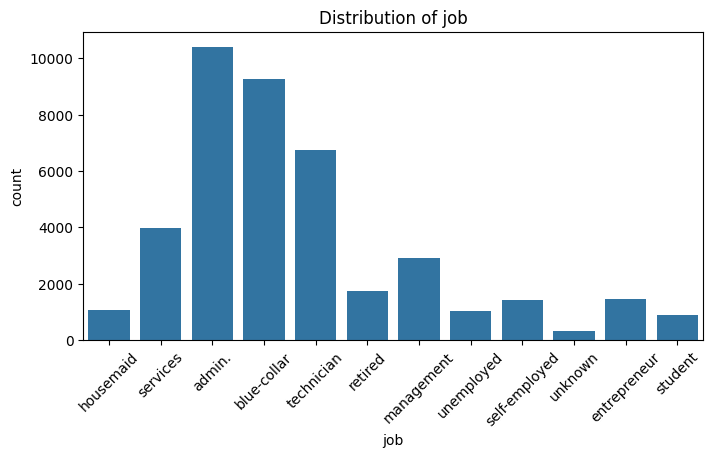

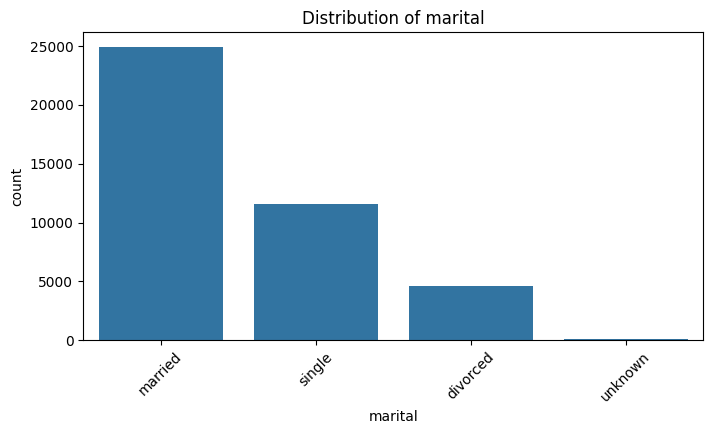

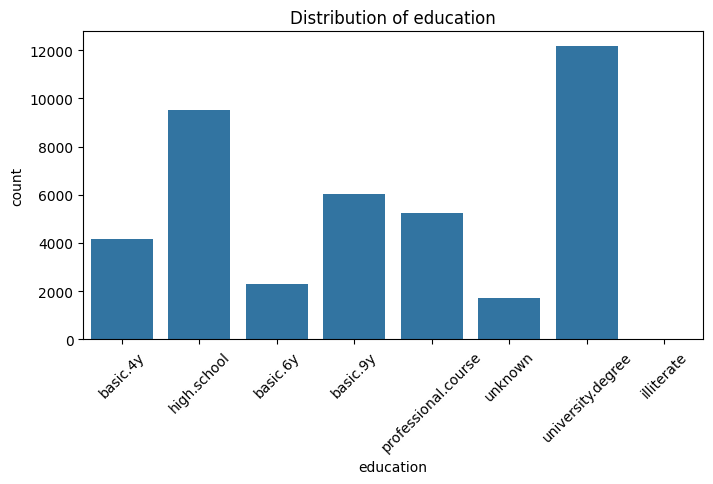

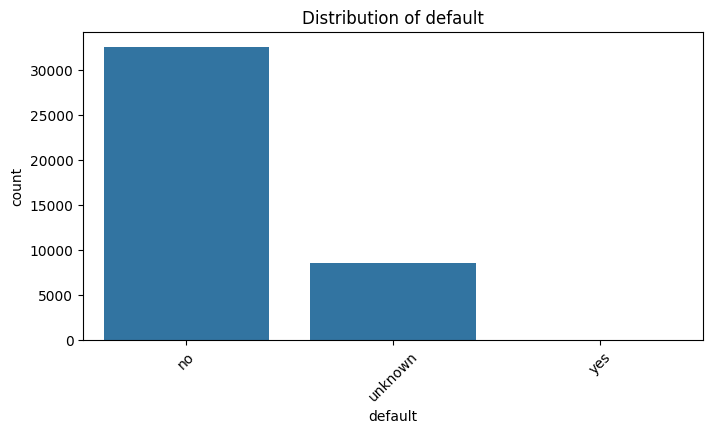

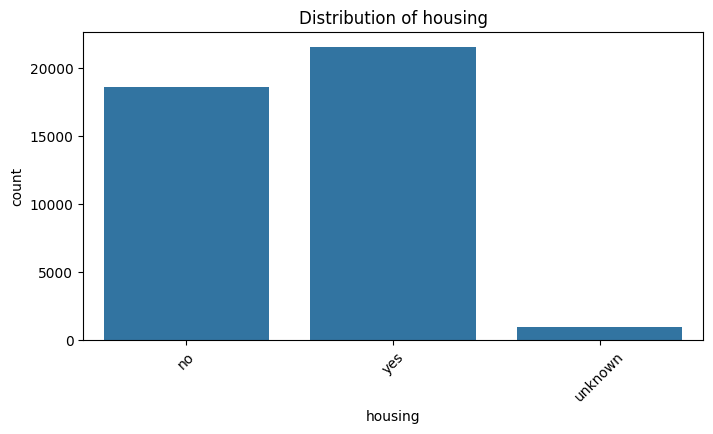

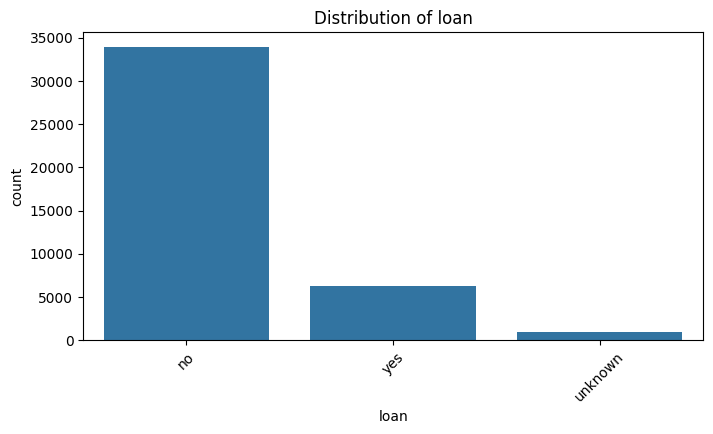

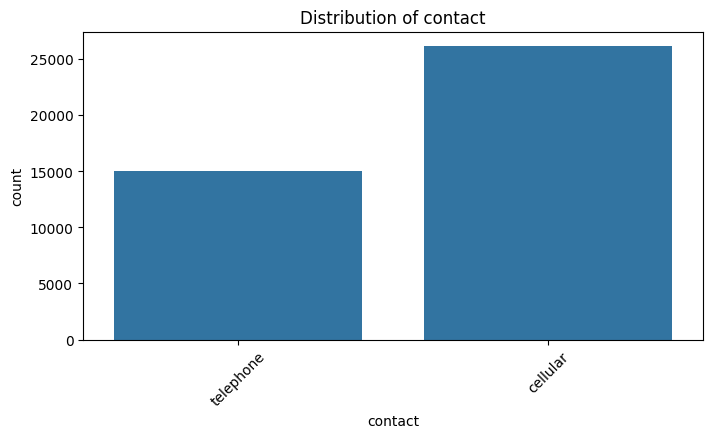

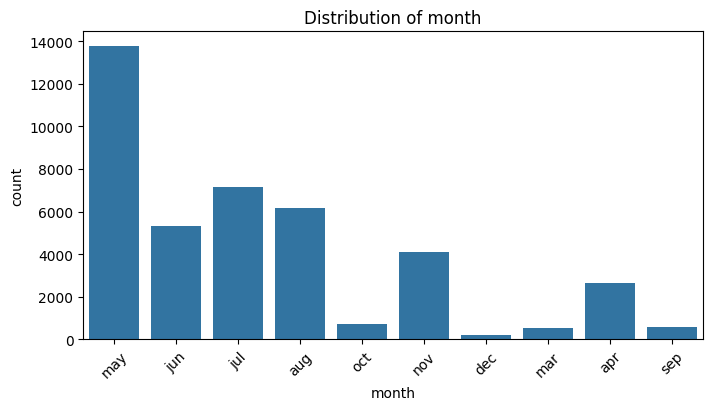

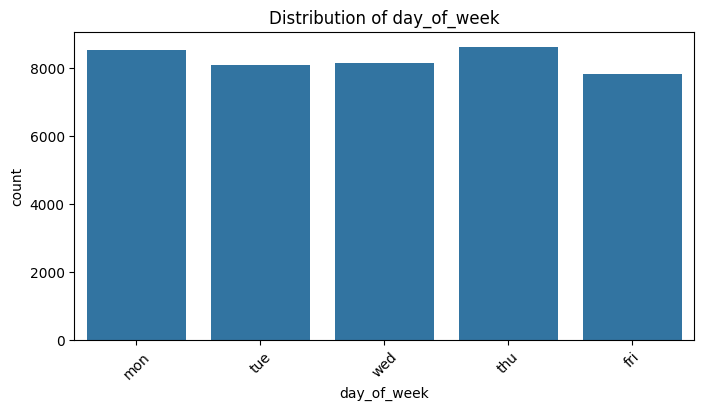

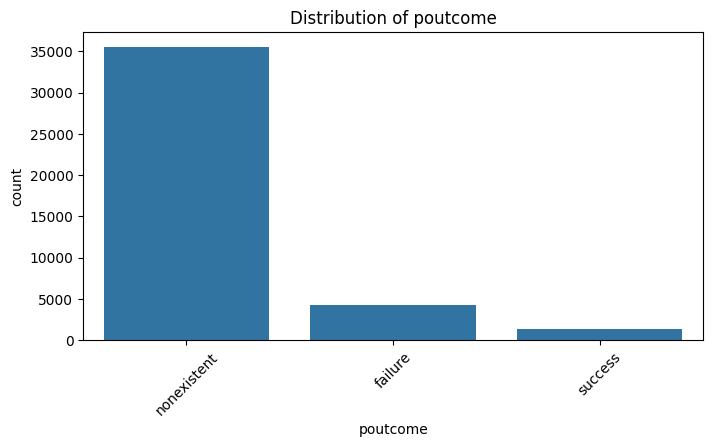

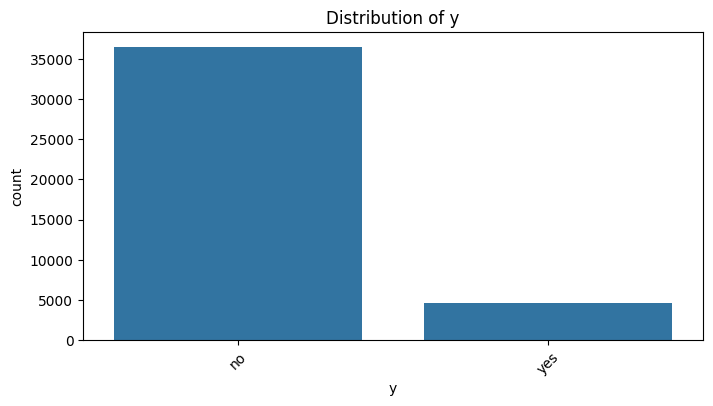

In [53]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


#### Distribution of numerical columns

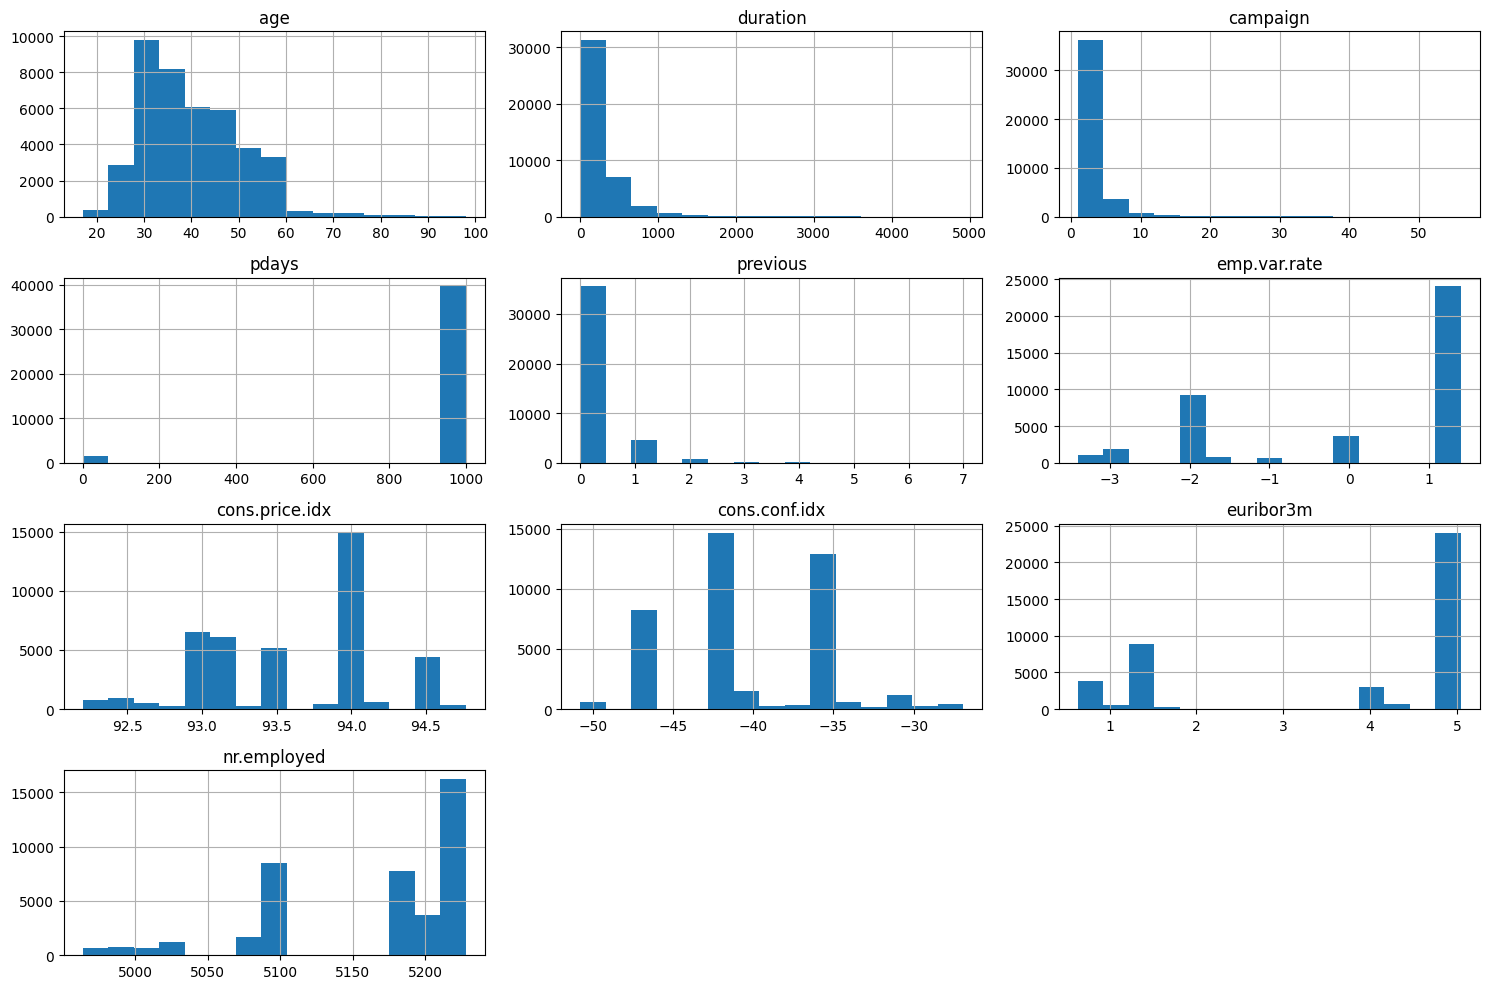

In [54]:
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.tight_layout()
plt.show()


### Bivariate Analysis

##### Which age group is more likely to subscribe?

In [55]:
df['age'].value_counts()

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

In [56]:
df['age'].nunique()

78

In [57]:
print(f'min age:', df['age'].min())
print(f'max age:', df['age'].max())

min age: 17
max age: 98


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25520\2677042731.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_by_age_group = df_copy.groupby('age_group')['y'].apply(lambda x: (x == 'yes').mean()).sort_values(ascending=False)


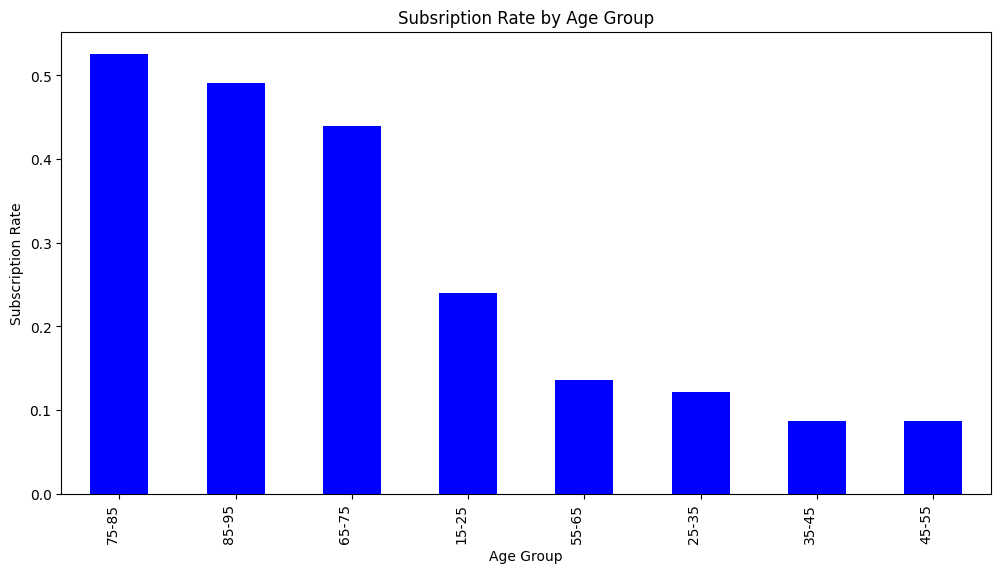

In [58]:
# Create age bins and labels
bins = list(range(15,100,10))
labels = [f'{i}-{i+10}' for i in bins[:-1]]

#Create a copy of the dataframe
df_copy = df.copy()
#Categorize ages into bins
df_copy['age_group'] = pd.cut(df_copy['age'],bins=bins, labels=labels,right=False)

# Calculate conversion rate by age group
conversion_by_age_group = df_copy.groupby('age_group')['y'].apply(lambda x: (x == 'yes').mean()).sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(12, 6))
conversion_by_age_group.plot(kind='bar', color='blue')
plt.title('Subsription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=90, ha='right')
plt.show()


From the plot above, it is evident that the older age groups have a higher conversion rate. From about 65 years, the number of people subscribing to the insurance is high compared to the other age groups.

The age groups with the lowest conversion rate include: 35-45.

##### Are customers in certain job categories more likely to subscribe?

In [59]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [60]:

conversion_by_occupation= df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean()).sort_values(ascending=False)
conversion_by_occupation

job
student          0.314286
retired          0.252326
unemployed       0.142012
admin.           0.129726
management       0.112175
unknown          0.112121
technician       0.108260
self-employed    0.104856
housemaid        0.100000
entrepreneur     0.085165
services         0.081381
blue-collar      0.068943
Name: y, dtype: float64

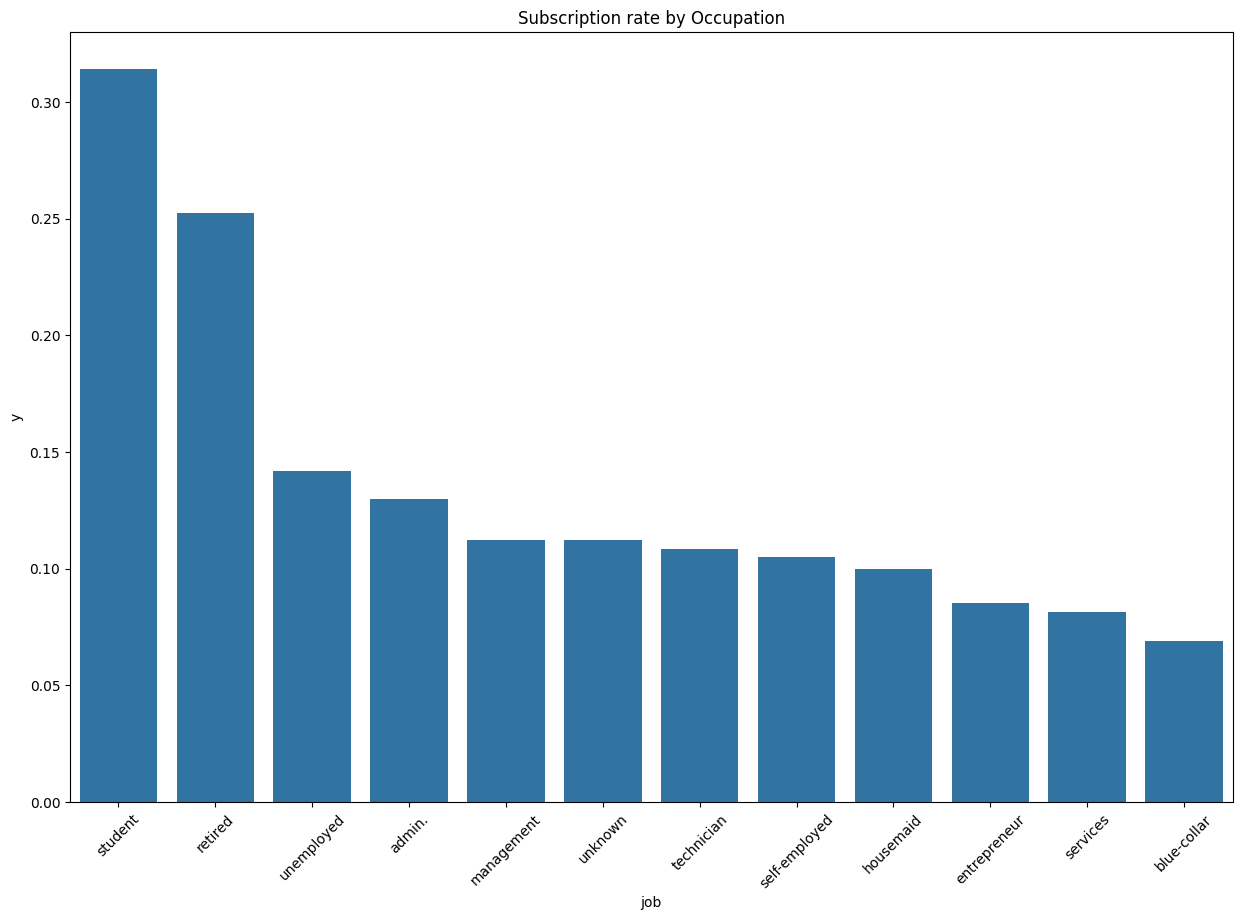

In [61]:
plt.figure(figsize=(15,10))
sns.barplot(data=conversion_by_occupation)
plt.title('Subscription rate by Occupation')
plt.xticks(rotation=45)
plt.show()

From the plot above, it is clear that the occupations with the most people converted is 'Student', 'Retired Worker' and 'Unemployed'.

On the other hand, the occupations with the least people enrolling for the insurance offered are 'Blue-collar', 'Services' and 'Entrepreneur'.

##### Does marital status affect the decision to subscribe to a term deposit?

In [62]:
df['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [63]:
conversion_by_marital = df.groupby('marital')['y'].apply(lambda x:(x=='yes').mean()).sort_values(ascending=False)
conversion_by_marital

marital
unknown     0.150000
single      0.140041
divorced    0.103209
married     0.101573
Name: y, dtype: float64

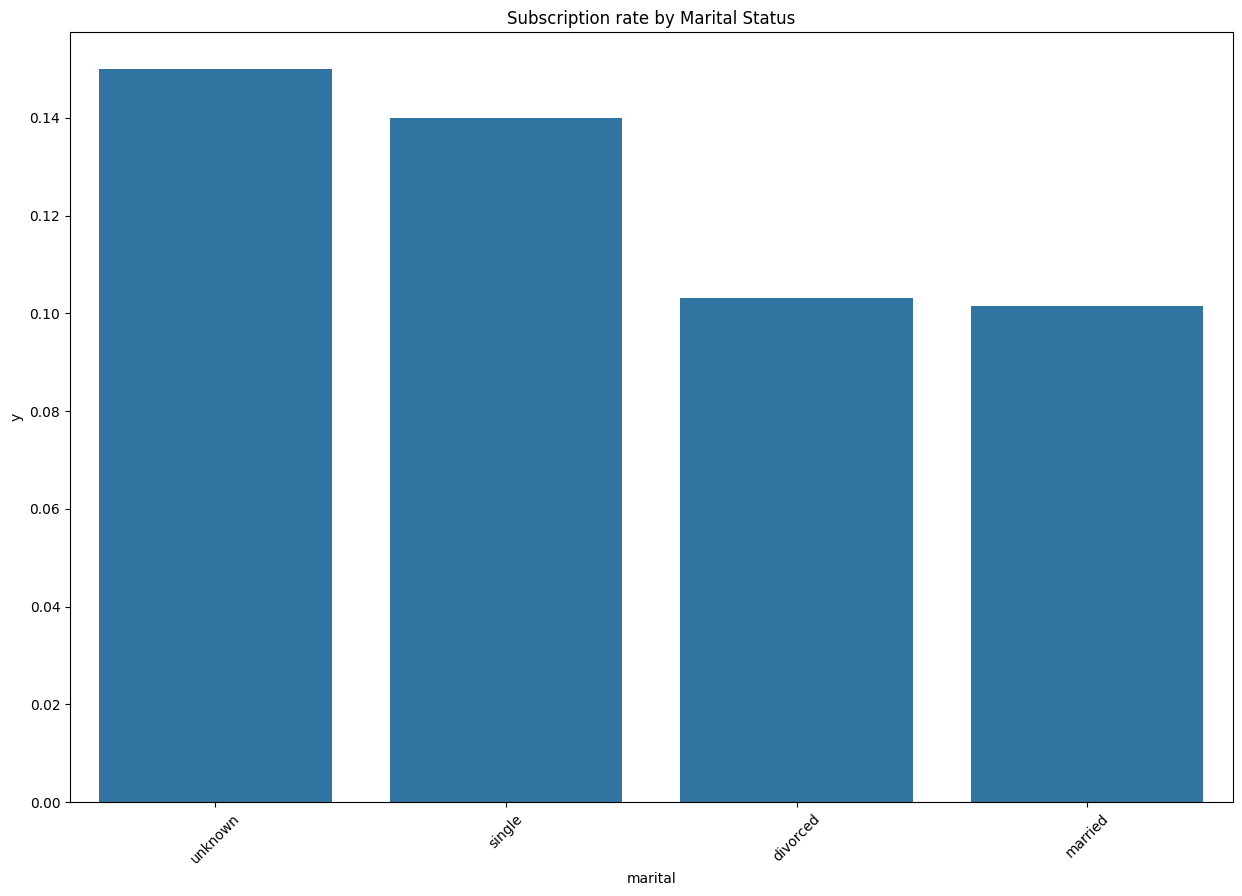

In [64]:
plt.figure(figsize=(15,10))
sns.barplot(data=conversion_by_marital)
plt.title('Subscription rate by Marital Status')
plt.xticks(rotation=45)
plt.show()

From the plot above, it is evident that people who are registered as 'unknown' and 'single' have the highest subcription rates into the term deposit. While customer who are registered as 'married' have the least subscription rates

##### Does education level correlate with a higher likelihood of subscription?

In [65]:
df['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [66]:
conversion_by_education = df.groupby('education')['y'].apply(lambda x:(x=='yes').mean()).sort_values(ascending=False)
conversion_by_education

education
illiterate             0.222222
unknown                0.145003
university.degree      0.137245
professional.course    0.113485
high.school            0.108355
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
Name: y, dtype: float64

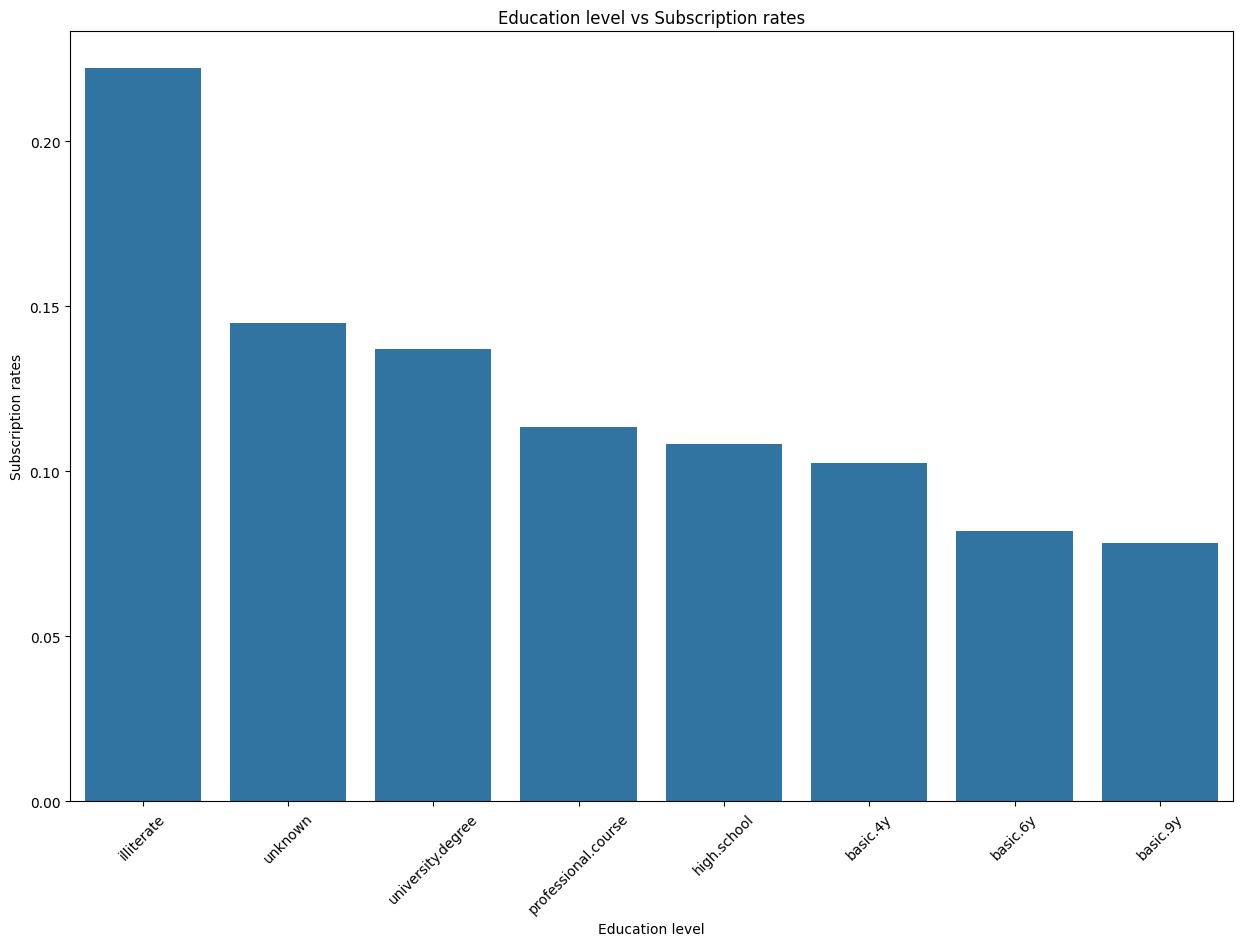

In [67]:
plt.figure(figsize=(15,10))
sns.barplot(data=conversion_by_education)
plt.title('Education level vs Subscription rates')
plt.xticks(rotation=45)
plt.xlabel('Education level')
plt.ylabel('Subscription rates')
plt.show()

From the plot above, it is evident that the group with the highest subcription rates are those whose education level is 'illiterate'. This shows that the phone call marketing strategy has been effective as compared to using writing materials.

##### Does having a housing loan influence the subscription decision?

In [68]:
df['housing'].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [69]:
conversion_by_housing = df.groupby('housing')['y'].apply(lambda x:(x=='yes').mean()).sort_values(ascending=False)
conversion_by_housing

housing
yes        0.116194
no         0.108796
unknown    0.108081
Name: y, dtype: float64

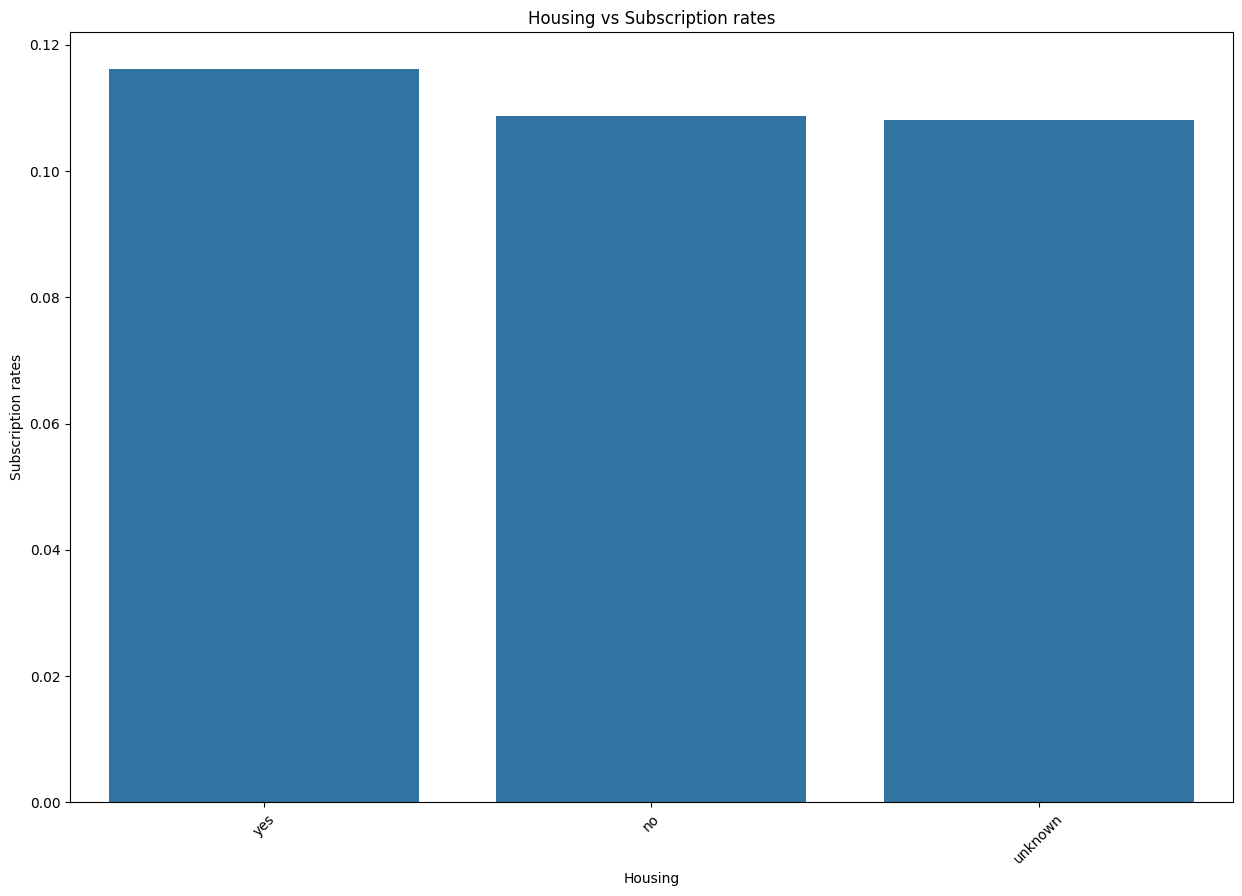

In [70]:
plt.figure(figsize=(15,10))
sns.barplot(data=conversion_by_housing)
plt.title('Housing vs Subscription rates')
plt.xticks(rotation=45)
plt.xlabel('Housing')
plt.ylabel('Subscription rates')
plt.show()

This indicates that whether or not a customer has taken a housing loan has little impact on the subscription rates.

##### Does the contact method affect subscription?

In [71]:
df['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [72]:
df['contact'].value_counts(normalize=True)

contact
cellular     0.634748
telephone    0.365252
Name: proportion, dtype: float64

In [73]:
conversion_by_contact = df.groupby('contact')['y'].apply(lambda x:(x=='yes').mean()).sort_values(ascending=False)
conversion_by_contact

contact
cellular     0.147376
telephone    0.052313
Name: y, dtype: float64

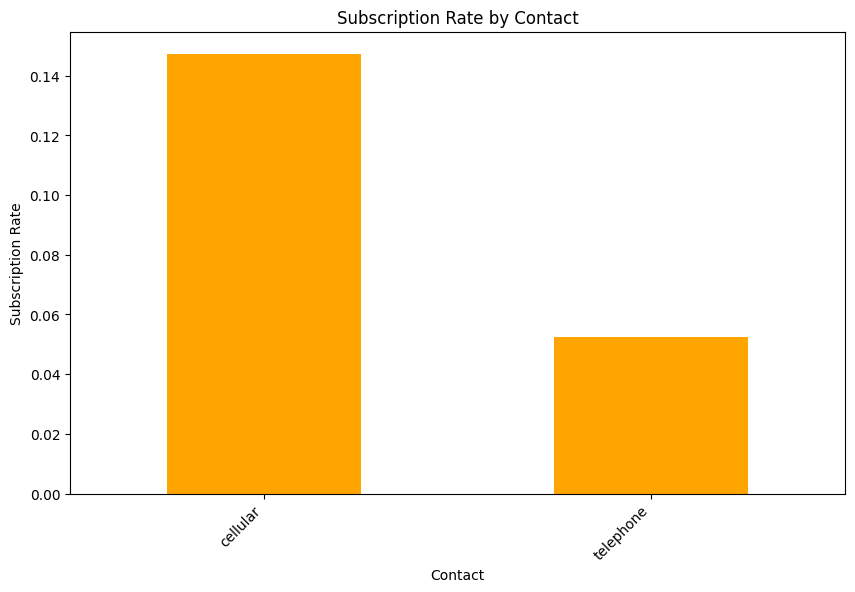

In [74]:
plt.figure(figsize=(10, 6))
conversion_by_contact.plot(kind='bar', color='orange')
plt.title('Subscription Rate by Contact')
plt.xlabel('Contact')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

From this plot, we can deduce that the use of cellular has been more effective as a marketing strategy as compared to telephone device. This may be as a result of the how common a cellular device is hence making it easier to reach a large number of people.

##### Does the duration of the phone call affect the likehood of a customer to subscribe?

In [75]:
df['duration'].value_counts()

duration
90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: count, Length: 1544, dtype: int64

In [76]:
df['duration'].nunique()

1544

In [77]:
conversion_by_duration = df.groupby('duration')['y'].apply(lambda x:(x=='yes').mean()).sort_values(ascending=False)
conversion_by_duration

duration
998     1.0
949     1.0
830     1.0
1613    1.0
959     1.0
       ... 
1140    0.0
1131    0.0
1128    0.0
1118    0.0
4918    0.0
Name: y, Length: 1544, dtype: float64

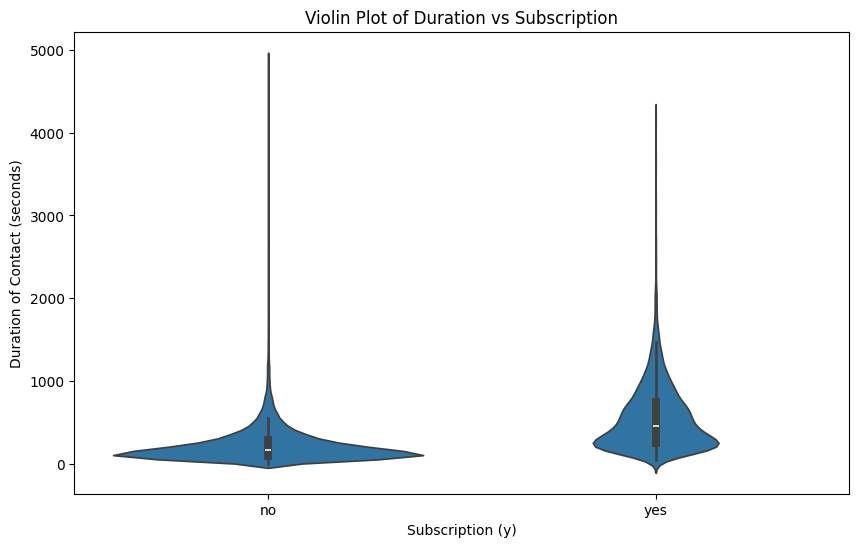

In [94]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='y', y='duration', data=df)

# Add labels and title
plt.xlabel('Subscription (y)')
plt.ylabel('Duration of Contact (seconds)')
plt.title('Violin Plot of Duration vs Subscription')

plt.show()


##### Are there seasonal trends affecting the likelihood of subscriptions?

In [79]:
df['month'].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [80]:
conversion_by_month = df.groupby('month')['y'].apply(lambda x:(x=='yes').mean()).reset_index()
conversion_by_month

,month,y
0,apr,0.204787
1,aug,0.106021
2,dec,0.489011
3,jul,0.090466
4,jun,0.105115
5,mar,0.505495
6,may,0.064347
7,nov,0.101439
8,oct,0.438719
9,sep,0.449123


In [81]:


# Ensure the correct order of months
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Apply the conversion with ordering
conversion_by_month = df.groupby('month')['y'].apply(lambda x: (x == 'yes').mean()).reset_index()

# Convert the 'month' column to categorical with the specific order
conversion_by_month['month'] = pd.Categorical(conversion_by_month['month'], categories=month_order, ordered=True)

# Sort the dataframe by the correct month order
conversion_by_month = conversion_by_month.sort_values('month').reset_index(drop=True)

# Display the ordered dataframe
conversion_by_month


,month,y
0,mar,0.505495
1,apr,0.204787
2,may,0.064347
3,jun,0.105115
4,jul,0.090466
5,aug,0.106021
6,sep,0.449123
7,oct,0.438719
8,nov,0.101439
9,dec,0.489011


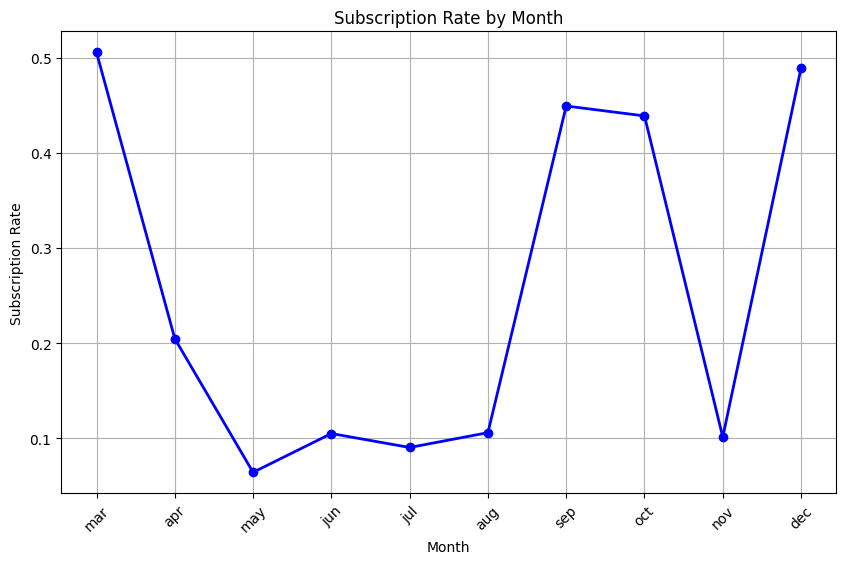

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(conversion_by_month['month'], conversion_by_month['y'], marker='o', color='b', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Month')

# Ensure the months are in the correct order
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

With evidence from the plot, we can see that subscription rates peaked in March and December while May had the lowest subscription rate.

##### What is the impact of previous cmpaign on current subscription rates?

In [83]:
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [84]:
conversion_by_poutcome = df.groupby('poutcome')['y'].apply(lambda x:(x=='yes').mean()).sort_values(ascending=False)
conversion_by_poutcome

poutcome
success        0.651129
failure        0.142286
nonexistent    0.088322
Name: y, dtype: float64

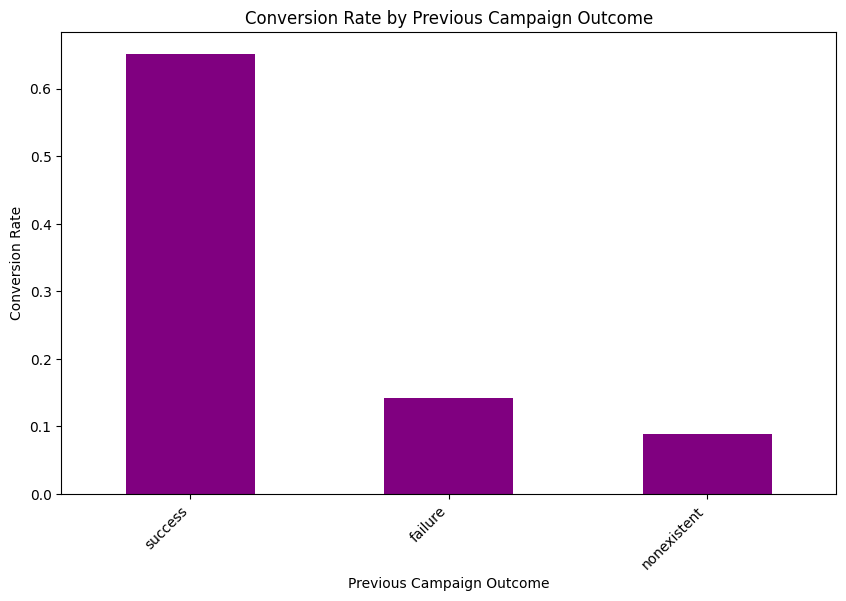

In [85]:
plt.figure(figsize=(10, 6))
conversion_by_poutcome.plot(kind='bar', color='purple')
plt.title('Conversion Rate by Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

From the plot, it is evident that there is higher subscription rate from people who had a successfully subscribed from previous campaigns.

##### How do economic variables such as employment variation rate, consumer price index, and Euribor affect subscriptions?

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [87]:
features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


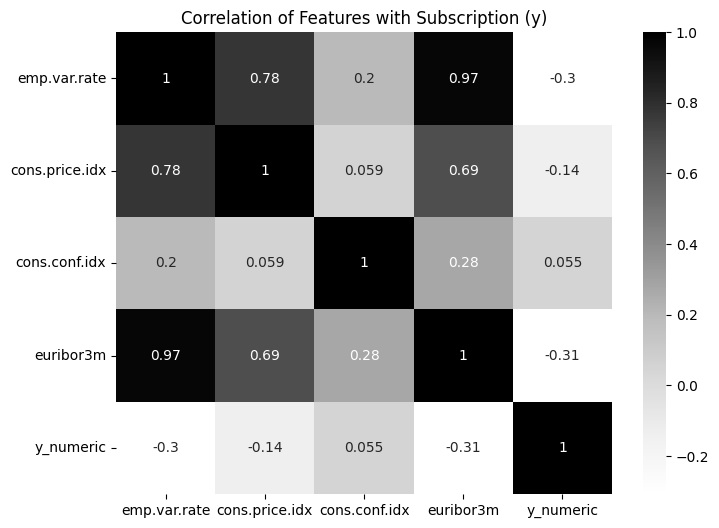

In [88]:
# Encode 'y' column to numerical values (yes = 1, no = 0)
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

# Check correlations with the target variable 'y'
correlations = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y_numeric']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='Greys')
plt.title('Correlation of Features with Subscription (y)')
plt.savefig('image01.png')
plt.show()


-Employment variation rate (emp.var.rate) has a correlation of -0.3 with y_numeric. This suggests that as the employment variation rate increases, the likelihood of a customer subscribing decreases.

-Euribor 3-month rate (euribor3m) also has a negative correlation of -0.31 with the target variable. This indicates that higher Euribor rates are associated with a lower probability of customers subscribing.

-Consumer price index (cons.price.idx) has a weak negative correlation of -0.14, implying a slight inverse relationship with subscription rates.

Economic factors such as employment variation and Euribor rates have the most notable negative impact on subscription behavior, while other variables have relatively weak or minimal influence on predicting subscriptions. Overally, these eceonomic factor have a weak contribution to the likelihood of a customer subscribing to the bank's term deposit.